# Machine Learning Project 1
---

In [15]:
## import required libraries
import numpy as np
import matplotlib.pyplot as plt

## global variables
k = 9
gamma = 0.148

In [2]:
def format_train_test_data(dataset):
    """
    A function to properly structure the dataset given for 
    machine learning and split into features and labels.
    
    Parameters
    ----------
    dataset - list of str
    txt file loaded as working data
    
    Returns
    -------
    data - numpy array of float
    features to use for machine learning
    
    labels - numpy array of float
    target label to train and predict
    """
    
    data = []
    labels = []

    for i in [i[:-2].split(',') for i in dataset]:
        data.append(float(i[0]))
        labels.append(float(i[1]))
    
    return np.array(data), np.array(labels)

In [3]:
## load data
with open('train.txt') as f:
    train_dataset = f.readlines()
    f.close()
    
with open('test.txt') as f:
    test_dataset = f.readlines()
    f.close()

In [4]:
## split the data samples and target labels
train_data, train_labels = format_train_test_data(train_dataset)
test_data, test_labels = format_train_test_data(test_dataset)

## Linear Regression
---

In [5]:
train_data

array([-1.8475, -1.7145, -1.799 ,  1.9735, -2.1055, -1.9045,  2.8715,
        1.0555, -2.3495,  0.0095, -2.058 ,  1.088 , -2.975 ,  0.0055,
        0.7355, -1.992 ,  0.8455,  1.1435,  2.726 ,  0.829 ,  2.558 ,
        2.6245, -2.767 , -1.5505,  1.0515, -2.528 ,  0.171 ,  1.5595,
       -1.775 , -2.292 ,  0.9735, -2.553 , -1.6655,  0.779 ,  0.7455,
        0.6135,  1.0505, -1.424 , -0.28  ,  1.0075,  2.546 , -1.086 ,
       -2.1855, -2.5675,  0.7245,  1.3365,  2.367 , -1.31  , -1.4615,
       -0.6745, -2.807 , -0.341 ,  1.9135, -1.007 , -0.938 , -1.3405,
        0.432 ,  0.5765, -1.8885, -1.8005,  0.709 , -1.374 , -2.1065,
       -0.4975,  1.065 , -0.4505,  0.0255,  1.5385, -0.8035, -2.8775,
        2.3425,  0.9755,  2.8815, -2.3325, -1.5275, -2.9085,  0.7415,
       -0.8315,  1.8745,  1.2025, -1.2145,  1.807 ,  1.821 , -0.7235,
       -1.8515, -2.1   , -1.054 ,  0.2195,  0.0765, -2.9935, -1.272 ,
        2.643 , -0.976 ,  1.8175, -2.0385,  1.8325, -0.278 , -0.3905,
       -0.665 , -1.4

In [6]:
train_labels

array([3.36521471, 3.62150642, 2.77288215, 3.33545393, 2.65599921,
       3.15785379, 4.01381019, 4.20567855, 3.04801762, 4.15355878,
       3.788929  , 4.17386981, 3.407027  , 4.05331679, 4.09784179,
       2.89698757, 3.55959317, 3.32861496, 3.86758951, 3.58373174,
       3.19240231, 3.49183074, 3.67324263, 3.2789379 , 4.15117506,
       3.15985355, 3.83782813, 3.75594202, 2.81480768, 3.26089534,
       3.66120128, 3.5196493 , 3.53272489, 3.88545922, 4.08844463,
       3.68528903, 4.03036925, 2.8751021 , 3.68620773, 3.18904313,
       3.32995593, 2.89154541, 3.23046642, 2.96775281, 4.1067371 ,
       3.22507235, 3.8430813 , 3.35534313, 3.38976192, 3.91392252,
       2.7616583 , 4.03269254, 3.83118592, 3.68644366, 2.81412939,
       3.90227339, 3.78068581, 3.36177703, 3.38587433, 3.1698534 ,
       4.20372703, 3.85510948, 2.51949364, 3.53277336, 4.22925152,
       3.54185191, 3.98231433, 3.82062565, 3.48414648, 3.16619382,
       3.80495969, 3.7205957 , 3.67743934, 2.73038359, 3.33356

In [7]:
test_data

array([ 2.9285,  1.0435, -0.81  ,  0.304 ,  2.759 , -0.466 ,  0.393 ,
        2.061 ,  0.472 , -2.668 ])

In [8]:
test_labels

array([3.73256587, 3.16233331, 3.68827889, 3.02815428, 3.2981016 ,
       3.42671802, 4.0360535 , 3.22793407, 3.80969437, 3.48972569])

In [9]:
def basis_functions(data, k, d):
    """
    This function computes the basis functions for a given 
    set of x-values, frequency increment k, and function depth d.
    
    Parameters
    ----------
    data - numpy array of float
    
    k - int
    global value defined at the top
    
    d - int
    variable ranging from 0 to 6
    

    Returns
    -------
    a numpy array of shape (N, 2*d+2), where N is the number of x-values.
    """
    
    sin_cos = np.empty((len(data), 2*d))
    for i in range(d):
        sin_cos[:, 2*i] = ((np.sin((i+1)*k*data))**(i*k))*np.cos(data)
        sin_cos[:, 2*i+1] = ((np.cos((i+1)*k*data))**(i*k))*np.sin(data)
    
    return np.column_stack((np.ones_like(data), data, sin_cos, np.sin(k*data), np.cos(k*data)))

In [46]:
def linear_regression(x_train, y_train, x_test, y_test, k, d):
    """
    Fits a linear regression model to the training data and evaluates its performance on the testing data.
    
    Parameters
    ----------
    x_train - numpy array of float
    training data features
    
    y_train - numpy array of float
    training labels
    
    x_test - numpy array of float
    testing data features
    
    y_test - numpy array of float
    testing labels
    
    k - int
    global value defined at the top
    
    d - int
    variable ranging from 0 to 6
    
    Returns
    -------
    
    beta -
    the fitted parameter vector
    
    y_pred_train - 
    
    y_pred_test -
    
    mse - 
    the mean squared error (MSE) on the testing data
    
    
    """
    
    X_train = basis_functions(x_train, k, d)
    X_test = basis_functions(x_test, k, d)
    
    # compute the MPP of the design matrix
    X_pinv = np.linalg.pinv(X_train)    
    # fit the model to the training data
    beta = np.dot(X_pinv, y_train)
    
    # evaluate the model on the train data
    y_pred_train = np.dot(X_train, beta)
    # evaluate the model on the train data
    y_pred_test = np.dot(X_test, beta)
    
    mse = np.mean((y_test - y_pred_test)**2)
    
    return beta, y_pred_train, y_pred_test, mse

## Linear Regression Execution

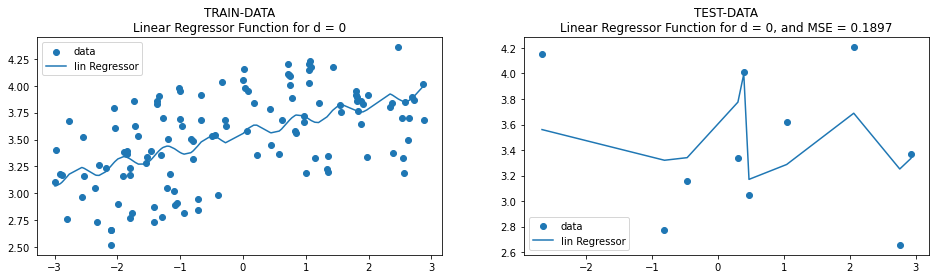

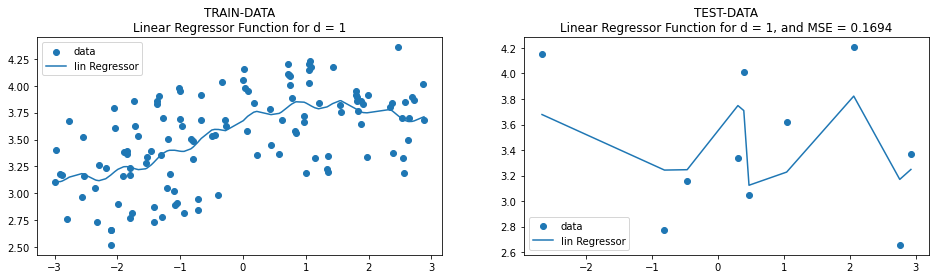

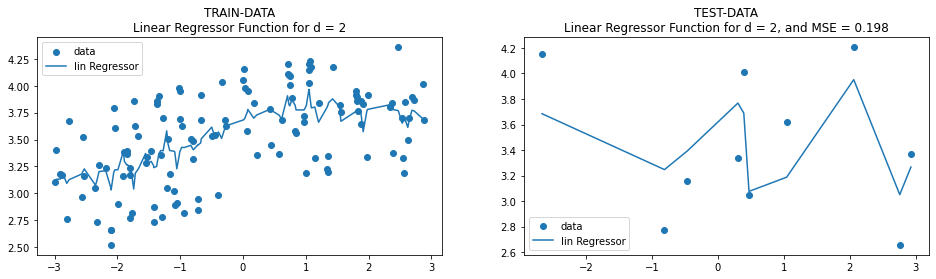

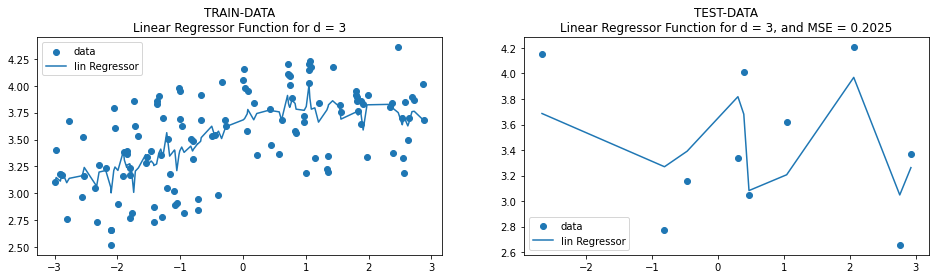

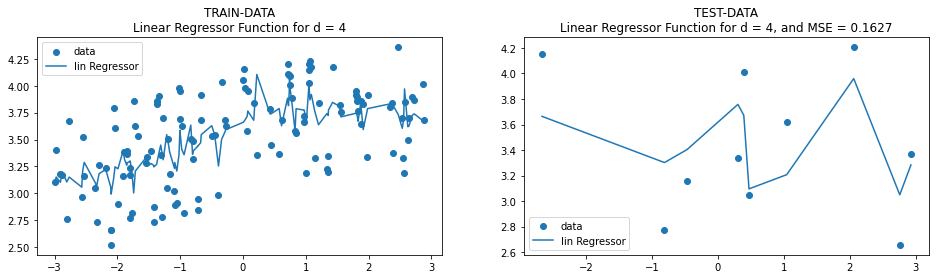

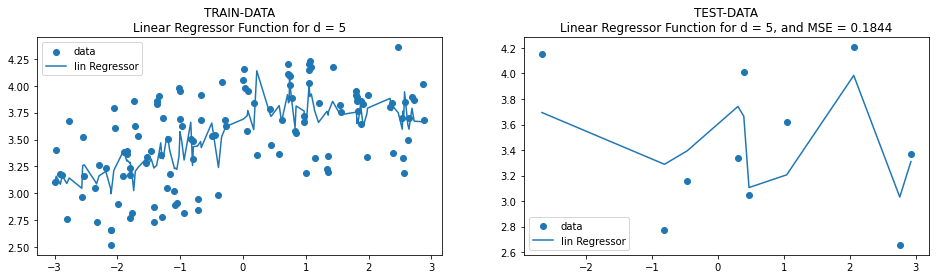

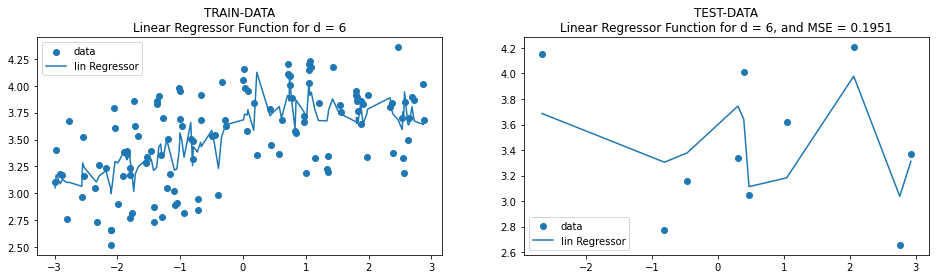

In [63]:
## Performance analysis on train_data
train_sorted_ind = np.argsort(train_data)
test_sorted_ind = np.argsort(test_data)

mse_list = []

for d in range(7):
    beta, y_pred_train, y_pred_test, mse = linear_regression(train_data, 
                                                             train_labels, 
                                                             test_data, 
                                                             test_labels, 
                                                             k, 
                                                             d)
    
    mse_list.append(mse)

    ## plot figure for each iteration
    plt.figure(figsize=(16,4))
    plt.subplot(121)
    title = "TRAIN-DATA\nLinear Regressor Function for d = "+str(d)
    plt.title(title)
    plt.scatter(train_data[train_sorted_ind], train_labels[train_sorted_ind])
    plt.plot(train_data[train_sorted_ind], y_pred_train[train_sorted_ind])
    labels = ["data","lin Regressor"]
    plt.legend(labels)
    
    plt.subplot(122)
    title = "TEST-DATA\nLinear Regressor Function for d = "+str(d)+", and MSE = "+str(round(mse,4))
    plt.title(title)
    plt.scatter(test_data[test_sorted_ind], train_labels[test_sorted_ind])
    plt.plot(test_data[test_sorted_ind], y_pred_train[test_sorted_ind])
    labels = ["data","lin Regressor"]
    plt.legend(labels)
    
    plt.show()

        



In [64]:
mse_list

[0.18974638714677605,
 0.16941529120457421,
 0.19797794262177268,
 0.20249443221274901,
 0.1627197183254449,
 0.18435124760446156,
 0.19514028219767182]

### Linear Regression Conclusion
---

In this program, I designed a linear regressor and tested its performance using test data. I am using Mean Squared Error (MSE) to determine the performance of the function.

In the above cell, we can see the output of variable mse_list
- The index signifies the depth value (d) 
- The value signifies the MSE for that depth (d)

#### Here are my <u>observations</u> about the regression function with variable function depths
- The data itself is pretty scattered
- For d = 1, the function is catching the trend of data points and is producing second lowest MSE for test data
- For d = 4, the MSE for test data is lowest
- But as discussed in class, I would choose the regressor with function depth 1 to be the best model, because it gives MSE close to minimum while capturing the natural trend of data
- I believe that as I am increasing the function depth, the model is overfitting. We can see the same thing using MSE as it starts to increase a little as d increases, precisely after d = 1.

# ********---------********---------********---------********---------********---------********---------********

## Locally Weighted Linear Regression
---

In [149]:
def calculate_weights(X, x_query, gamma):
    return np.exp(-(X - x_query) ** 2 / (2 * gamma ** 2))

def locally_weighted_linear_regression(X_train, y_train, x_query, gamma):
    weights = calculate_weights(X_train[:,1], x_query, gamma)
    W = np.diag(weights.flatten())
    temp = np.dot(X_train.T,W)
    theta = np.linalg.inv(X_train.T @ W @ X_train) @ X_train.T @ W @ y_train
    print(x_query)
    print(theta)
    y_pred = (np.array([1, x_query]).T) @ theta
    return y_pred

In [115]:
X_train = np.zeros((len(train_data),2))

In [116]:
X_train[:,0] = 1
X_train[:,1] = train_data

In [117]:
X_train

array([[ 1.    , -1.8475],
       [ 1.    , -1.7145],
       [ 1.    , -1.799 ],
       [ 1.    ,  1.9735],
       [ 1.    , -2.1055],
       [ 1.    , -1.9045],
       [ 1.    ,  2.8715],
       [ 1.    ,  1.0555],
       [ 1.    , -2.3495],
       [ 1.    ,  0.0095],
       [ 1.    , -2.058 ],
       [ 1.    ,  1.088 ],
       [ 1.    , -2.975 ],
       [ 1.    ,  0.0055],
       [ 1.    ,  0.7355],
       [ 1.    , -1.992 ],
       [ 1.    ,  0.8455],
       [ 1.    ,  1.1435],
       [ 1.    ,  2.726 ],
       [ 1.    ,  0.829 ],
       [ 1.    ,  2.558 ],
       [ 1.    ,  2.6245],
       [ 1.    , -2.767 ],
       [ 1.    , -1.5505],
       [ 1.    ,  1.0515],
       [ 1.    , -2.528 ],
       [ 1.    ,  0.171 ],
       [ 1.    ,  1.5595],
       [ 1.    , -1.775 ],
       [ 1.    , -2.292 ],
       [ 1.    ,  0.9735],
       [ 1.    , -2.553 ],
       [ 1.    , -1.6655],
       [ 1.    ,  0.779 ],
       [ 1.    ,  0.7455],
       [ 1.    ,  0.6135],
       [ 1.    ,  1.0505],
 

In [150]:
# generate some sample data
X_train = X_train
y_train = train_labels

# generate a query point
x_query = np.array([[0]])

y_pred = []
for row in train_data:
    # run locally weighted linear regression
    y_pred_temp = locally_weighted_linear_regression(X_train, y_train, row, gamma)
    y_pred.append(y_pred_temp)


# print the result
# print(f"Predicted y value for x_query = {x_query[0, 1]}: {y_pred:.4f}")

-1.8475
[4.48664475 0.67256033]
-1.7145
[4.02075524 0.41157448]
-1.799
[4.40610228 0.62847198]
1.9735
[ 5.25986799 -0.78605112]
-2.1055
[4.47001154 0.67118182]
-1.9045
[4.54149605 0.70191205]
2.8715
[2.05313727 0.63002344]
1.0555
[ 4.07763568 -0.230365  ]
-2.3495
[ 2.18298126 -0.37634105]
0.0095000000000001
[ 3.90136492 -0.40546717]
-2.058
[4.66023502 0.7639073 ]
1.088
[ 4.32929745 -0.47024428]
-2.975
[ 2.73743727 -0.1600528 ]
0.0055000000000001
[ 3.89930835 -0.35117148]
0.7355
[3.85929485 0.02513704]
-1.992
[4.66736142 0.76720789]
0.8455
[ 4.08425275 -0.26399519]
1.1435
[ 4.77714326 -0.88496927]
2.726
[1.85831641 0.70036426]
0.829
[ 4.09589506 -0.27777597]
2.558
[ 3.74107488 -0.02327391]
2.6245
[2.81074084 0.33729531]
-2.767
[3.53566231 0.11609509]
-1.5505
[3.46350693 0.07975334]
1.0515
[ 4.0519326  -0.20554695]
-2.528
[ 1.76481428 -0.55673233]
0.171
[ 3.942761   -1.23888912]
1.5595
[2.79104963 0.60997819]
-1.775
[4.32821193 0.5852823 ]
-2.292
[ 2.67113895 -0.16231295]
0.9735
[ 3.8543

In [153]:
y_pred

[3.24408953719111,
 3.3151107962127524,
 3.2754811799531245,
 3.708596102554941,
 3.0568382216904073,
 3.2047045579871583,
 3.862249566452475,
 3.834485416255316,
 3.0671945584533766,
 3.897512986221343,
 3.0881137899340785,
 3.8176716771301367,
 3.2135943530950852,
 3.8973769112880996,
 3.8777831417495667,
 3.1390832991305166,
 3.8610448144863727,
 3.76518090621979,
 3.76750938354782,
 3.8656187866299527,
 3.681540213794601,
 3.6959723929388995,
 3.214427201074567,
 3.3398493763358257,
 3.8357999822736684,
 3.172233612404998,
 3.730910956302574,
 3.7423106214053243,
 3.2893358439352607,
 3.0431602385055236,
 3.8430537716907294,
 3.184347542773808,
 3.326530491178419,
 3.8778525363742764,
 3.8793473398872234,
 3.7673585219985024,
 3.836105333348315,
 3.351255951980834,
 3.6724807914704005,
 3.8424928918273737,
 3.6825564790186527,
 3.3493368958859047,
 3.0292258586769147,
 3.1904379863113057,
 3.874712002807174,
 3.605910007835176,
 3.739180372261669,
 3.353393268672888,
 3.34709786877